In [67]:
# from utils import parser
from datasets.PCNDataset import PCN
import argparse
import numpy as np
import os, sys


In [73]:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')
        sys._jupyter_stdout = sys.stdout

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [28]:
from utils.config import get_config
from datasets import build_dataset_from_cfg

In [8]:
# class Args():
#     self.config = ""
parser = argparse.ArgumentParser()
args = parser.parse_args(args=[])

In [13]:
args.config = 'cfgs/PCN_models/Transformer_pcn_skel.yaml'
args.resume = None
args.local_rank = 1

In [14]:
config = get_config(args)

In [74]:
with HiddenPrints():
    dataset = build_dataset_from_cfg(config.dataset.val._base_, config.dataset.val.others)

2023-07-10 11:11:37,240 - PCNDATASET - INFO - Collecting files of Taxonomy [ID=02691156, Name=airplane]
2023-07-10 11:11:37,240 - Collecting files of Taxonomy [ID=02691156, Name=airplane]
2023-07-10 11:11:37,243 - PCNDATASET - INFO - Collecting files of Taxonomy [ID=02933112, Name=cabinet]
2023-07-10 11:11:37,243 - Collecting files of Taxonomy [ID=02933112, Name=cabinet]
2023-07-10 11:11:37,246 - PCNDATASET - INFO - Collecting files of Taxonomy [ID=02958343, Name=car]
2023-07-10 11:11:37,246 - Collecting files of Taxonomy [ID=02958343, Name=car]
2023-07-10 11:11:37,251 - PCNDATASET - INFO - Collecting files of Taxonomy [ID=03001627, Name=chair]
2023-07-10 11:11:37,251 - Collecting files of Taxonomy [ID=03001627, Name=chair]
2023-07-10 11:11:37,255 - PCNDATASET - INFO - Collecting files of Taxonomy [ID=03636649, Name=lamp]
2023-07-10 11:11:37,255 - Collecting files of Taxonomy [ID=03636649, Name=lamp]
2023-07-10 11:11:37,258 - PCNDATASET - INFO - Collecting files of Taxonomy [ID=0425652

In [58]:
print(len(dataset), dataset[0][2][0].shape, dataset[0][2][1].shape) # partial, gt

pcd_partial = dataset[0][2][0].detach().cpu().numpy()
pcd_gt = dataset[0][2][1].detach().cpu().numpy()

800 torch.Size([2048, 3]) torch.Size([16384, 3])


In [60]:
from pc_skeletor import SLBC, LBC
import open3d as o3d

In [63]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pcd_partial)
lbc = LBC(point_cloud=pcd, down_sample=0.03)

In [64]:
lbc.extract_skeleton()

2023-07-10 11:04:31,634 - PCD #points: 189
Current volume ratio 1.0. Contraction weights 26.88696721316916. Attraction weights 7.489894513093356. Progress LBC:  10%|█         | 2/20 [00:00<00:00, 44.45it/s]2023-07-10 11:04:31,703 - Contraction is Done.
Current volume ratio 1.0. Contraction weights 26.88696721316916. Attraction weights 7.489894513093356. Progress LBC:  15%|█▌        | 3/20 [00:00<00:00, 52.13it/s]

Contraction is Done.


array([[-6.12623375e-02, -2.02460699e-02, -3.68207223e-03],
       [-1.98428754e-01,  4.29624710e-03, -2.41350279e-04],
       [-6.10196082e-02, -2.03249341e-02, -4.38921596e-03],
       [-6.49975468e-02, -1.99874163e-02, -1.00222493e-03],
       [ 2.35737832e-01, -2.12416405e-02, -1.05914065e-02],
       [-5.36584179e-02, -2.04777658e-02, -3.86346506e-03],
       [ 2.43185955e-01, -2.11940477e-02, -1.06967394e-02],
       [-6.86665417e-02, -1.93938856e-02, -1.26849806e-03],
       [-1.38148849e-01, -8.05705958e-03, -1.29235195e-03],
       [-7.70571792e-02, -1.80099535e-02, -2.15702004e-03],
       [-5.91174805e-02, -2.03482065e-02, -4.23134008e-03],
       [-5.67285824e-02, -2.03821570e-02, -3.94544849e-03],
       [-2.25605501e-01,  1.09652728e-02,  8.32998614e-04],
       [-1.36672620e-01, -8.31412435e-03, -1.30650970e-03],
       [-6.12638371e-02, -2.02622973e-02, -3.84859101e-03],
       [-7.51702158e-02, -1.83140987e-02, -2.01350825e-03],
       [-3.58630801e-02, -2.10151679e-02

In [76]:
skelton = np.asarray(lbc.contracted_point_cloud.points)

In [78]:
skelton.shape

(189, 3)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
def vis_points(ax, pcd, title, rangesize=1, ptsize=0.5):
    ax.scatter3D (pcd[:, 0],pcd[:, 1],pcd[:, 2], s=ptsize, zdir='y')
#     ax.axis("off")
    ax.set_title(title)
    ax.set_xlim(-rangesize, rangesize)
    ax.set_ylim(-rangesize, rangesize)
    ax.set_zlim(-rangesize, rangesize)

    return ax

<Axes3DSubplot:title={'center':'input_2048'}>

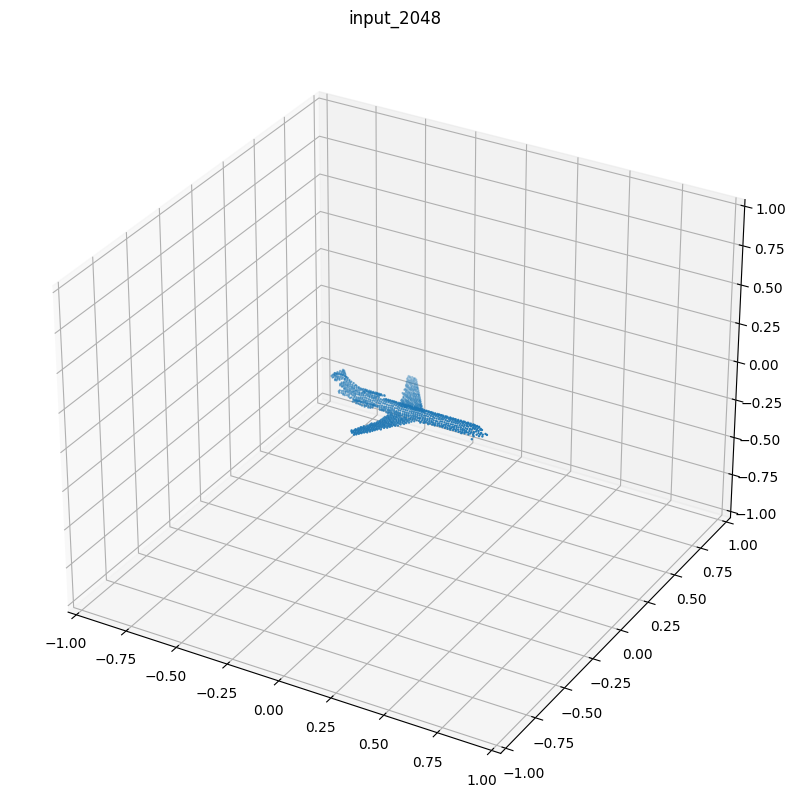

In [47]:
fig = plt.figure()
fig.set_size_inches(5, 10)
ax = fig.add_subplot(121, projection='3d')
vis_points(ax, pcd_partial,  "input_" + str(pcd_partial.shape[0]))
ax = fig.add_subplot(122, projection='3d')
vis_points(ax, skelton,  "skeleton_" + str(skelton.shape[0]))

In [ ]:
import numpy as np
import trimesh

In [ ]:
path = "weights/trainingrecon-weight_pointbert3/86_3000_skel.off"
path = "weights/trainingrecon-weight_pointbert3/102_11000_skel.off"
path = "weights/trainingrecon-weight_pointbert3/100_10000_skel.off"


mesh = trimesh.load(path.replace("skel", "input"))
pcd1 = mesh.vertices

mesh = trimesh.load(path)
pcd2 = mesh.vertices

mesh = trimesh.load(path.replace("skel", "recon"))
pcd3 = mesh.vertices


ValueError: string is not a file: weights/trainingrecon-weight_pointbert3/100_10000_input.off

In [ ]:
pcd1 = np.load("./data/TestShapeNet/shapenet_pc/1000-1branch.npy")1

In [ ]:
pcd1.max(), pcd1.min()

(0.5211902500105272, -0.4788097499894728)

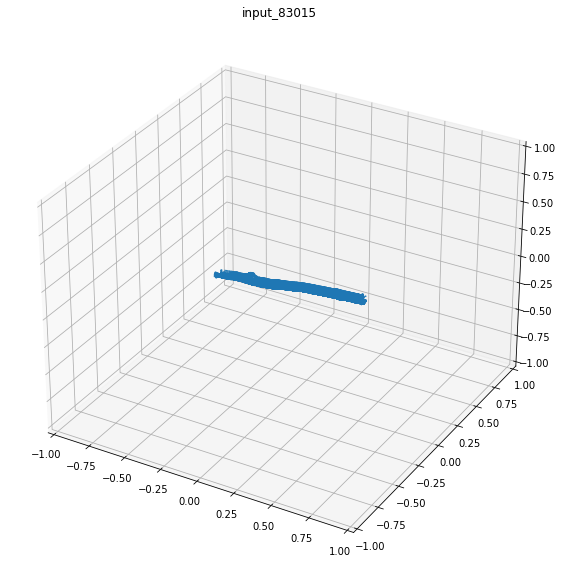

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')
vis_points(ax, pcd1,  "input_" + str(pcd1.shape[0]))


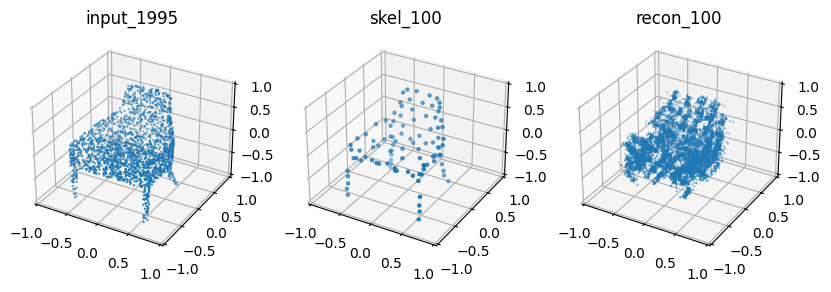

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 30)
ax = fig.add_subplot(131, projection='3d')
vis_points(ax, pcd1,  "input_" + str(pcd1.shape[0]))
ax = fig.add_subplot(132, projection='3d')
vis_points(ax, pcd2, "skel_"+str( pcd2.shape[0]), ptsize=5)
ax = fig.add_subplot(133, projection='3d')
vis_points(ax, pcd3, "recon_"+str( pcd2.shape[0]),  ptsize=0.1)


In [ ]:
mesh = trimesh.load("weights/trainingrecon-weight4/108_17000_input.off")
pcd1 = mesh.vertices
mesh = trimesh.load("weights/trainingrecon-weight4/108_17000_recon.off")
pcd2 = mesh.vertices



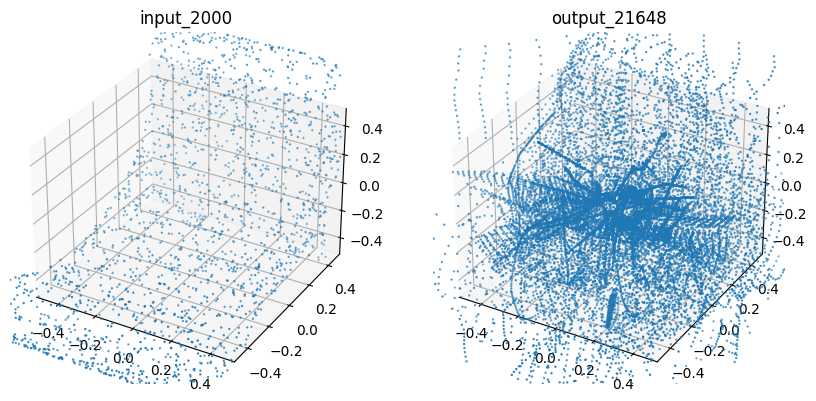

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 20)
ax = fig.add_subplot(121, projection='3d')
vis_points(ax, pcd1,  "input_" + str(pcd1.shape[0]))
ax = fig.add_subplot(122, projection='3d')
vis_points(ax, pcd2, "output_"+str( pcd2.shape[0]))


In [ ]:
mesh = trimesh.load("weights/trainingrecon-weight_pointbert2/108_14000_input.off")
pcd1 = mesh.vertices
mesh = trimesh.load("weights/trainingrecon-weight_pointbert2/108_14000_recon.off")
pcd2 = mesh.vertices


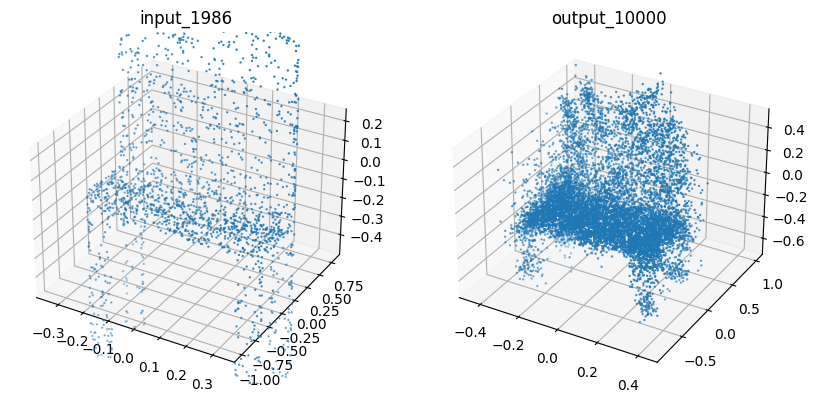

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 20)
ax = fig.add_subplot(121, projection='3d')
vis_points(ax, pcd1,  "input_" + str(pcd1.shape[0]))
ax = fig.add_subplot(122, projection='3d')
vis_points(ax, pcd2, "output_"+str( pcd2.shape[0]))


In [ ]:
# !pip install trimesh
import trimesh


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.6/681.6 kB 10.2 MB/s eta 0:00:00a 0:00:01


In [ ]:
# mesh = trimesh.load("results/1_skel_face.obj")
# mesh = trimesh.load("results/160_skel_face.obj")
mesh = trimesh.load("zivid_1/0_sphere.obj")

mesh.show()

In [ ]:
mesh = trimesh.load("input/zivid_2.ply")

In [ ]:
mesh.vertices.shape

(83015, 3)

In [ ]:
scale = 1/(mesh.bounds[1] - mesh.bounds[0]).max()

In [ ]:
mesh.apply_scale(scale)
mesh.bounds[1] - mesh.bounds[0]

array([1.        , 0.17741601, 0.08895358])

In [ ]:
center = mesh.centroid
mesh.apply_translation(-center)

<trimesh.PointCloud(vertices.shape=(83015, 3))>

In [ ]:
trimesh.sample.

In [ ]:
import torch
# mesh.vertices.shape

In [ ]:
input_pc = torch.tensor(mesh.vertices).cuda().float()


In [ ]:
input_pc.unsqueeze(axis=0).shape

torch.Size([1, 83015, 3])

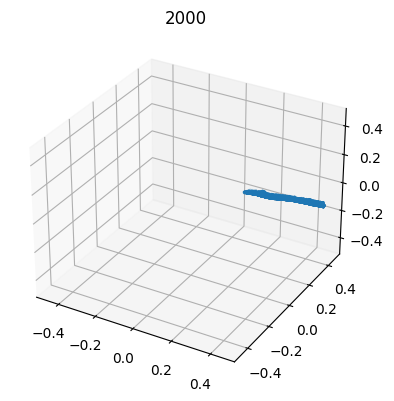

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(121, projection='3d')
vis_points(ax, mesh.vertices[::10], str( pcd.shape[0]))